In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt    #Plotting library used by seaborn, see http://matplotlib.org/users/pyplot_tutorial.html
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.api as sm 
import mapclassify as mp
import pysal as ps
import libpysal


In [133]:
df = pd.read_csv( r'C:\Users\Olga\Desktop\3rdyear\Dissertation\FullDataWind.csv', low_memory=False)
df.dropna(subset = ["Site 1(49.47, 30.780)Wind Speed (80m)", 'Site2(49.6, 30.95) Wind Speed [80 m]', 'Site3(49.89, 31.29)Wind Speed [80 m]'  ], inplace=True)
df.year = df.year.astype(int)
df.Month = df.Month.astype(int)

In [134]:
print(df.columns)
sns.set_style("whitegrid")

Index(['year', 'Month', 'Time', 'Time1', 'Site', 'Wind Speed ',
       'Site 1(49.47, 30.780)Wind Speed (80m)',
       'Site2(49.6, 30.95) Wind Speed [80 m]',
       'Site3(49.89, 31.29)Wind Speed [80 m]'],
      dtype='object')


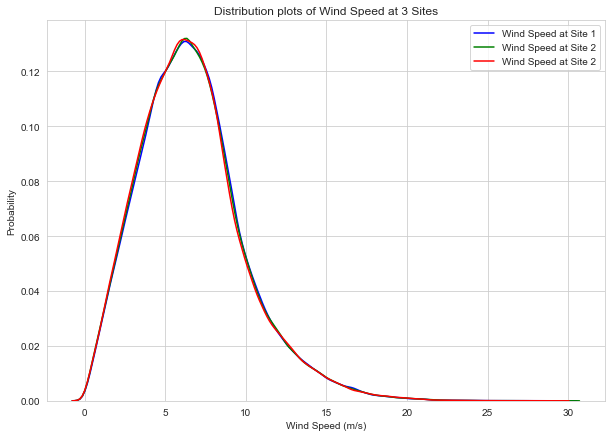

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 7))
sns.set_style("whitegrid")
a = sns.kdeplot(df['Site 1(49.47, 30.780)Wind Speed (80m)'],  color='blue', label = 'Wind Speed at Site 1', legend = True)
a = sns.kdeplot(df['Site2(49.6, 30.95) Wind Speed [80 m]'],   color = 'green', label = 'Wind Speed at Site 2', legend = True)
a = sns.kdeplot(df['Site3(49.89, 31.29)Wind Speed [80 m]'],   color = 'red', label = 'Wind Speed at Site 2', legend = True)
a.set(title = 'Distribution plots of Wind Speed at 3 Sites')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability')
plt.legend()
plt.savefig('WindSpeed.png', dpi=300)

In [89]:
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import normaltest
data = df['Site3(49.89, 31.29)Wind Speed [80 m]']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print(stats.kstest(data,'norm'))
print("So if p < 0.05, we don't believe that our variable follows a normal distribution in our population.")

Statistics=0.966, p=0.000
Sample does not look Gaussian (reject H0)
KstestResult(statistic=0.9212059400081986, pvalue=0.0)
So if p < 0.05, we don't believe that our variable follows a normal distribution in our population.


In [7]:

x = df['Site 1(49.47, 30.780)Wind Speed (80m)']
y = df['Site2(49.6, 30.95) Wind Speed [80 m]']
z = df['Site3(49.89, 31.29)Wind Speed [80 m]']
print(stats.kruskal(x, y, z))

KruskalResult(statistic=84.7149079677693, pvalue=4.0215314307200064e-19)


In [91]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(z, x)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=48626582745.000, p=0.000


In [92]:
import scipy
print(scipy.stats.epps_singleton_2samp(x, y))
print(scipy.stats.epps_singleton_2samp(x, z))
print(scipy.stats.epps_singleton_2samp(y, z))
print(scipy.stats.epps_singleton_2samp(x, x))

Epps_Singleton_2sampResult(statistic=25.399730196232333, pvalue=4.1805647822776214e-05)
Epps_Singleton_2sampResult(statistic=98.63944327401819, pvalue=1.9162637054309484e-20)
Epps_Singleton_2sampResult(statistic=27.478738318414013, pvalue=1.5905476545093237e-05)
Epps_Singleton_2sampResult(statistic=0.0, pvalue=1.0)


In [48]:
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
data = [x, y, z]
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,0.000019,1.038867e-19
2,1.875457e-05,1.000000,8.363642e-06
3,1.038867e-19,0.000008,1.000000e+00


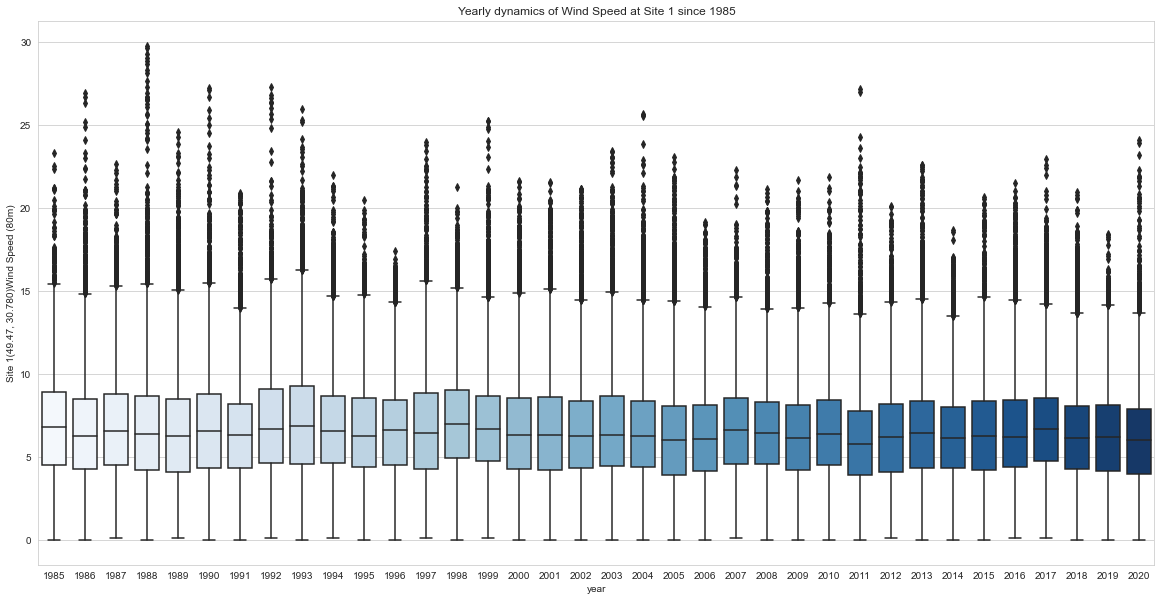

In [19]:
fig = plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="year", y= "Site 1(49.47, 30.780)Wind Speed (80m)",  data=df, palette="Blues", showfliers=True, )
ax.set(title = 'Yearly dynamics of Wind Speed at Site 1 since 1985')
plt.savefig('Boxplot Richness.png', dpi=300)

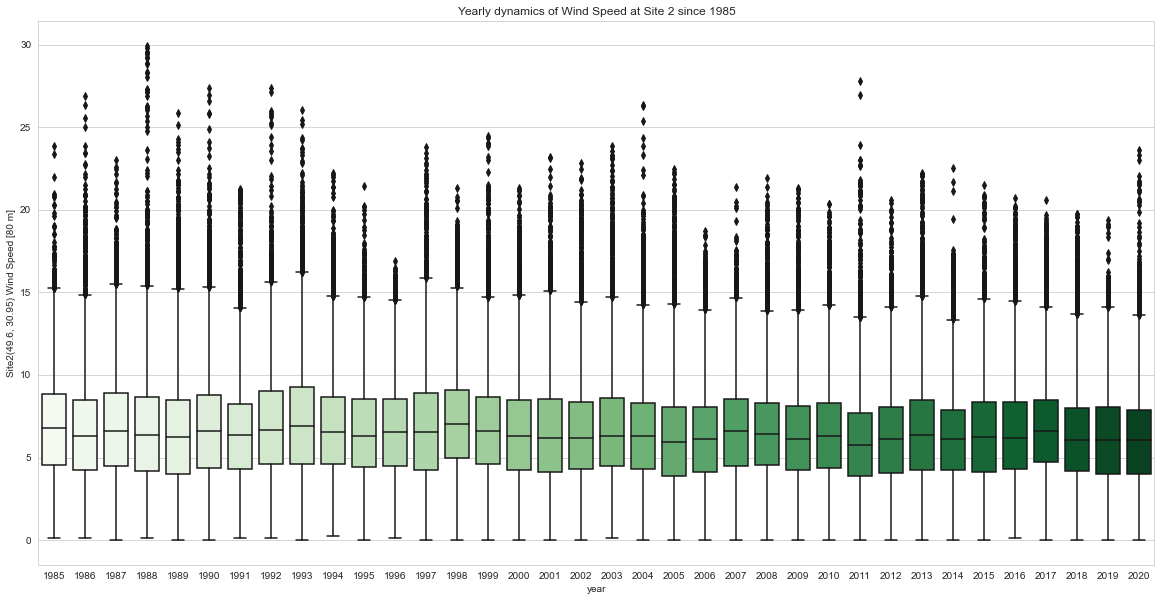

In [35]:
fig = plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="year", y= "Site2(49.6, 30.95) Wind Speed [80 m]",  data=df, palette="Greens", showfliers=True)
ax.set(title = 'Yearly dynamics of Wind Speed at Site 2 since 1985')
plt.savefig('Boxplot Richness.png', dpi=300)

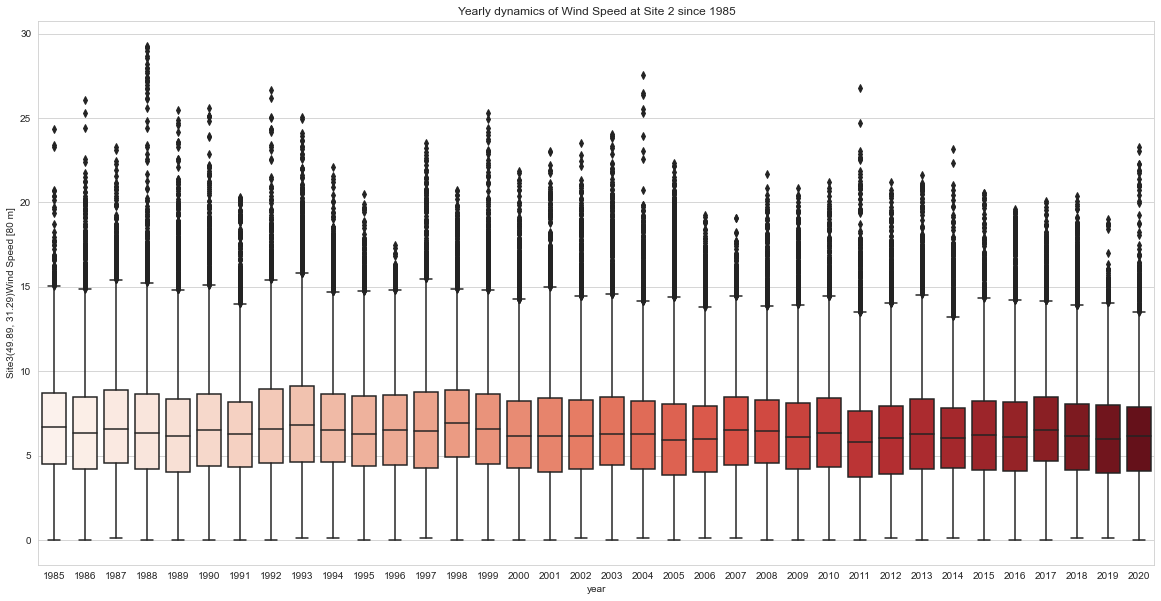

In [38]:
fig = plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="year", y= "Jan = df[df.Month == 1][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Feb = df[df.Month == 2][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Mar = df[df.Month == 3][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Apr = df[df.Month == 4][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
May = df[df.Month == 5][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Jun = df[df.Month == 6][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Jul = df[df.Month == 7][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Aug = df[df.Month == 8][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Sep = df[df.Month == 9][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Oct = df[df.Month == 10][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Nov = df[df.Month == 11][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Dec = df[df.Month == 12][["Site2(49.6, 30.95) Wind Speed [80 m]"]]

print(stats.kruskal(Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec))",  data=df, palette="Reds", showfliers=True)
ax.set(title = 'Yearly dynamics of Wind Speed at Site 2 since 1985')
plt.savefig('Boxplot Richness.png', dpi=300)

In [120]:
df.shape

(313968, 30)

In [94]:
Jan = df[df.Month == 1][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Feb = df[df.Month == 2][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Mar = df[df.Month == 3][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Apr = df[df.Month == 4][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
May = df[df.Month == 5][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Jun = df[df.Month == 6][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Jul = df[df.Month == 7][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Aug = df[df.Month == 8][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Sep = df[df.Month == 9][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Oct = df[df.Month == 10][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Nov = df[df.Month == 11][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Dec = df[df.Month == 12][["Site 1(49.47, 30.780)Wind Speed (80m)"]]

print(stats.kruskal(Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec))


KruskalResult(statistic=35956.79867995088, pvalue=0.0)


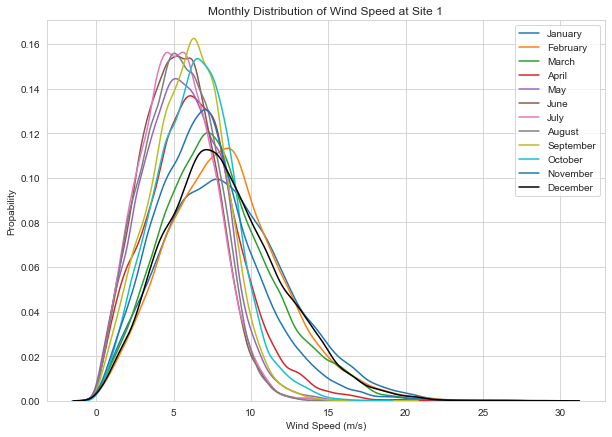

In [95]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.set_style("whitegrid")
a = sns.kdeplot(df['Jan1'], label = 'January')
a = sns.kdeplot(df['Feb1'],  label = 'February')
a = sns.kdeplot(df['Mar1'],   label = 'March')
a = sns.kdeplot(df['Apr1'],    label = 'April')
a = sns.kdeplot(df['May1'],    label = 'May')
a = sns.kdeplot(df['Jun1'],    label = 'June')
a = sns.kdeplot(df['Jul1'],   label = 'July')
a = sns.kdeplot(df['Aug1'],   label = 'August')
a = sns.kdeplot(df['Sep1'],    label = 'September')
a = sns.kdeplot(df['Oct1'],     label = 'October')
a = sns.kdeplot(df['Nov1'],    label = 'November')
a = sns.kdeplot(df['Dec1'],     label = 'December', color = 'black')
plt.legend()
plt.title('Monthly Distribution of Wind Speed at Site 1')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Propability')
plt.savefig('MonthlyDistSite1.png', dpi=300)

In [62]:

data = df[['Month', 'Site 1(49.47, 30.780)Wind Speed (80m)' ]]
sp.posthoc_dunn(data, group_col = 'Month', val_col = 'Site 1(49.47, 30.780)Wind Speed (80m)',  p_adjust = 'bonferroni')

,1,2,3,4,5,6,7,8,9,10,11,12
1,1.000000e+00,1.000000e+00,3.337893e-45,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.060851e-263,1.111036e-02
2,1.000000e+00,1.000000e+00,2.026344e-55,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.043712e-279,1.946480e-06
3,3.337893e-45,2.026344e-55,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.403255e-92,3.830503e-24
4,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.333366e-145,0.000000e+00,0.000000e+00,2.923681e-258,5.740850e-26,1.670146e-06,1.512108e-148,0.000000e+00
5,0.000000e+00,0.000000e+00,0.000000e+00,2.333366e-145,1.000000e+00,8.490228e-37,1.901561e-41,2.468955e-16,7.095583e-48,8.821488e-218,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.490228e-37,1.000000e+00,1.000000e+00,7.788058e-04,9.233982e-166,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.901561e-41,1.000000e+00,1.000000e+00,2.186167e-05,8.084139e-177,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000e+00,0.000000e+00,0.000000e+00,2.923681e-258,2.468955e-16,7.788058e-04,2.186167e-05,1.000000e+00,1.220535e-119,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,0.000000e+00,5.740850e-26,7.095583e-48,9.233982e-166,8.084139e-177,1.220535e-119,1.000000e+00,7.414434e-60,2.646879e-297,0.000000e+00
10,0.000000e+00,0.000000e+00,0.000000e+00,1.670146e-06,8.821488e-218,0.000000e+00,0.000000e+00,0.000000e+00,7.414434e-60,1.000000e+00,6.269566e-94,0.000000e+00


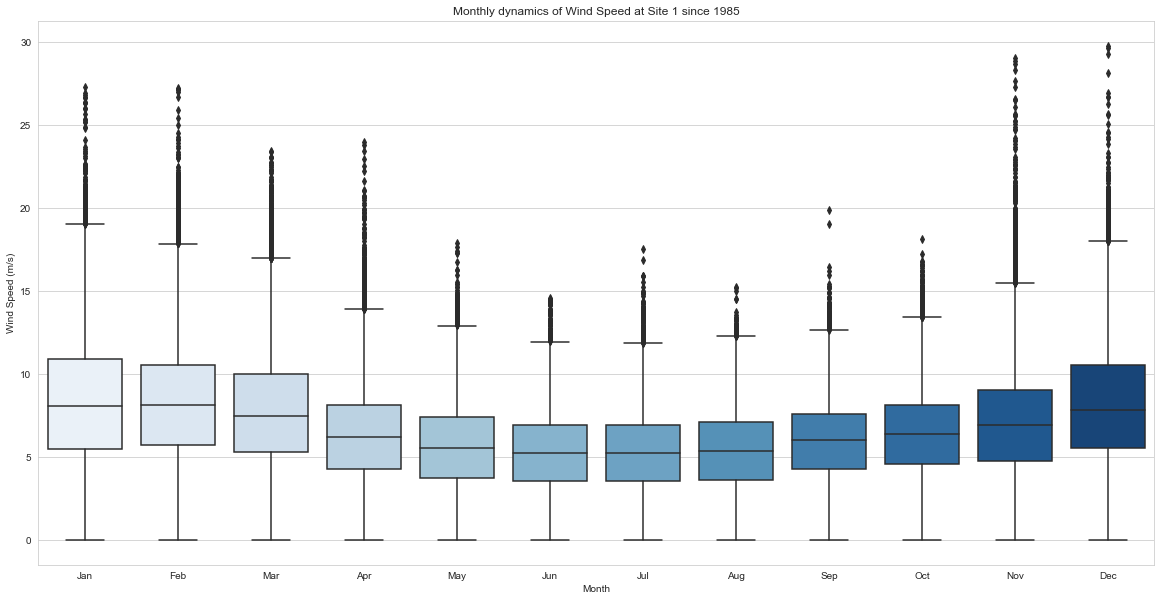

In [113]:
fig = plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="Month", y= "Site 1(49.47, 30.780)Wind Speed (80m)",  data=df,  palette="Blues", showfliers=True)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.ylabel('Wind Speed (m/s)')
ax.set(title = 'Monthly dynamics of Wind Speed at Site 1 since 1985')
plt.savefig('Boxplot Monthly Speeds Site 1.png', dpi=300)

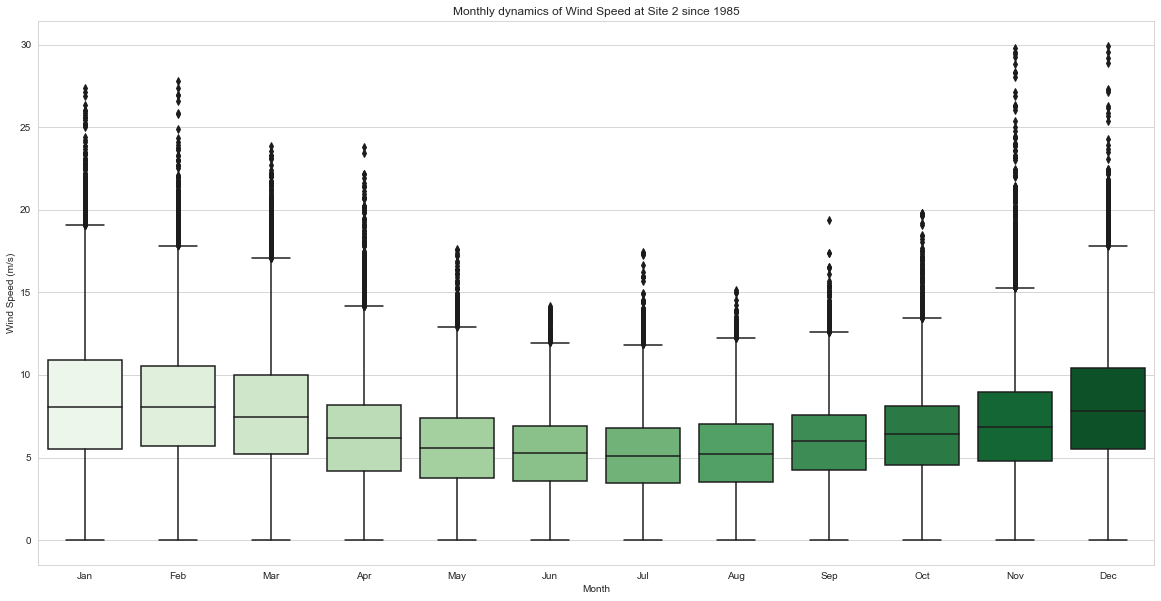

In [118]:
fig = plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="Month", y= "Site2(49.6, 30.95) Wind Speed [80 m]",  data=df,  palette="Greens", showfliers=True)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.ylabel('Wind Speed (m/s)')
ax.set(title = 'Monthly dynamics of Wind Speed at Site 2 since 1985')
plt.savefig('Boxplot Monthly Speeds Site 2.png', dpi=300)

In [116]:
data = df[['Month', 'Site2(49.6, 30.95) Wind Speed [80 m]' ]]
sp.posthoc_dunn(data, group_col = 'Month', val_col = 'Site2(49.6, 30.95) Wind Speed [80 m]',  p_adjust = 'bonferroni')

,1,2,3,4,5,6,7,8,9,10,11,12
1,1.000000e+00,1.000000e+00,2.488945e-47,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.614586e-271,8.932163e-03
2,1.000000e+00,1.000000e+00,1.455714e-56,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.483576e-284,3.609781e-06
3,2.488945e-47,1.455714e-56,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.013080e-94,1.917130e-25
4,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.164218e-144,0.000000e+00,0.000000e+00,0.000000e+00,7.225905e-33,3.743588e-04,1.735234e-129,0.000000e+00
5,0.000000e+00,0.000000e+00,0.000000e+00,4.164218e-144,1.000000e+00,7.151411e-35,7.411879e-69,7.329108e-37,9.062974e-39,3.339026e-202,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.151411e-35,1.000000e+00,4.301039e-05,1.000000e+00,9.551364e-145,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.411879e-69,4.301039e-05,1.000000e+00,1.236369e-04,9.982846e-209,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.329108e-37,1.000000e+00,1.236369e-04,1.000000e+00,6.244139e-150,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,0.000000e+00,7.225905e-33,9.062974e-39,9.551364e-145,9.982846e-209,6.244139e-150,1.000000e+00,2.646430e-62,3.889777e-291,0.000000e+00
10,0.000000e+00,0.000000e+00,0.000000e+00,3.743588e-04,3.339026e-202,0.000000e+00,0.000000e+00,0.000000e+00,2.646430e-62,1.000000e+00,1.605442e-87,0.000000e+00


In [110]:
Jan = df[df.Month == 1][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Feb = df[df.Month == 2][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Mar = df[df.Month == 3][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Apr = df[df.Month == 4][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
May = df[df.Month == 5][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Jun = df[df.Month == 6][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Jul = df[df.Month == 7][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Aug = df[df.Month == 8][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Sep = df[df.Month == 9][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Oct = df[df.Month == 10][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Nov = df[df.Month == 11][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Dec = df[df.Month == 12][["Site2(49.6, 30.95) Wind Speed [80 m]"]]

print(stats.kruskal(Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec))

KruskalResult(statistic=36325.343749775864, pvalue=0.0)


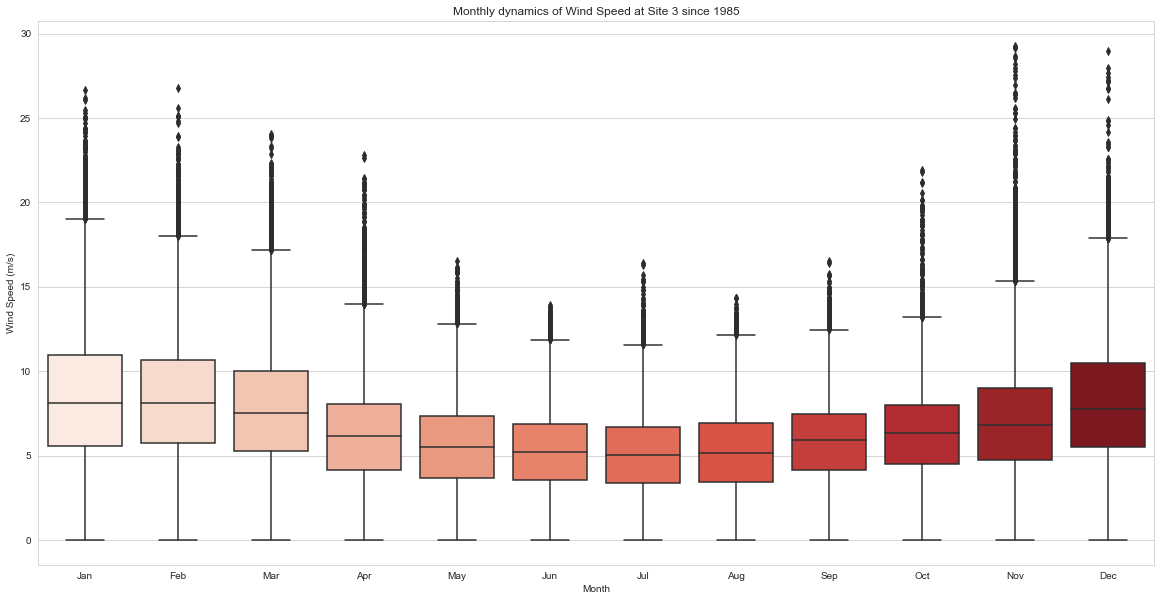

In [114]:
fig = plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="Month", y= "Site3(49.89, 31.29)Wind Speed [80 m]",  data=df,  palette="Reds", showfliers=True)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.ylabel('Wind Speed (m/s)')
ax.set(title = 'Monthly dynamics of Wind Speed at Site 3 since 1985')
plt.savefig('Boxplot Monthly Speeds Site 3.png', dpi=300)

In [152]:
Jan1 = df[df.Month == 1][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Feb1 = df[df.Month == 2][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Mar1 = df[df.Month == 3][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Apr1 = df[df.Month == 4][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
May1 = df[df.Month == 5][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Jun1 = df[df.Month == 6][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Jul1 = df[df.Month == 7][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Aug1 = df[df.Month == 8][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Sep1 = df[df.Month == 9][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Oct1 = df[df.Month == 10][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Nov1 = df[df.Month == 11][["Site 1(49.47, 30.780)Wind Speed (80m)"]]
Dec1 = df[df.Month == 12][["Site 1(49.47, 30.780)Wind Speed (80m)"]]


Jan2 = df[df.Month == 1][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Feb2 = df[df.Month == 2][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Mar2 = df[df.Month == 3][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Apr2 = df[df.Month == 4][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
May2 = df[df.Month == 5][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Jun2 = df[df.Month == 6][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Jul2 = df[df.Month == 7][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Aug2 = df[df.Month == 8][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Sep2 = df[df.Month == 9][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Oct2 = df[df.Month == 10][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Nov2 = df[df.Month == 11][["Site2(49.6, 30.95) Wind Speed [80 m]"]]
Dec2 = df[df.Month == 12][["Site2(49.6, 30.95) Wind Speed [80 m]"]]

Jan3 = df[df.Month == 1][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Feb3 = df[df.Month == 2][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Mar3 = df[df.Month == 3][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Apr3 = df[df.Month == 4][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
May3 = df[df.Month == 5][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Jun3 = df[df.Month == 6][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Jul3 = df[df.Month == 7][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Aug3 = df[df.Month == 8][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Sep3 = df[df.Month == 9][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Oct3 = df[df.Month == 10][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Nov3 = df[df.Month == 11][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Dec3 = df[df.Month == 12][["Site3(49.89, 31.29)Wind Speed [80 m]"]]

print(stats.kruskal(Jan1, Jan2, Jan3), 'Jan')
print(stats.kruskal(Feb1, Feb2, Feb3), 'Feb')
print(stats.kruskal(Mar1, Mar2, Mar3), 'Mar')
print(stats.kruskal(Apr1, Apr2, Apr3), 'Apr')
print(stats.kruskal(May1, May2, May3), 'May')
print(stats.kruskal(Jun1, Jun2, Jun3), 'Jun')
print(stats.kruskal(Jul1, Jul2, Jul3), 'Jul')
print(stats.kruskal(Aug1, Aug2, Aug3), 'Aug')
print(stats.kruskal(Sep1, Sep2, Sep3), 'Sep')
print(stats.kruskal(Oct1, Oct2, Oct3),'Oct' )
print(stats.kruskal(Nov1, Nov2, Nov3), 'Nov' )
print(stats.kruskal(Dec1, Dec2, Dec3),'Dec' )

KruskalResult(statistic=2.6112712498842074, pvalue=0.2710002257865442) Jan
KruskalResult(statistic=3.2142765347750695, pvalue=0.2004604582516592) Feb
KruskalResult(statistic=4.568908842781387, pvalue=0.10182960300713718) Mar
KruskalResult(statistic=4.179103577173471, pvalue=0.12374258622922758) Apr
KruskalResult(statistic=16.00132779755368, pvalue=0.0003352399885873336) May
KruskalResult(statistic=10.175855384737709, pvalue=0.006170794430594092) Jun
KruskalResult(statistic=90.42539926706388, pvalue=2.314056919494347e-20) Jul
KruskalResult(statistic=81.30076506170177, pvalue=2.2169871689451397e-18) Aug
KruskalResult(statistic=30.40529891148324, pvalue=2.4978895496581405e-07) Sep
KruskalResult(statistic=12.138201433011753, pvalue=0.0023132525453380564) Oct
KruskalResult(statistic=2.7904444968257374, pvalue=0.24777796198856306) Nov
KruskalResult(statistic=3.561952467497478, pvalue=0.16847359735056722) Dec


In [117]:
data = df[['Month', 'Site3(49.89, 31.29)Wind Speed [80 m]' ]]
sp.posthoc_dunn(data, group_col = 'Month', val_col = 'Site3(49.89, 31.29)Wind Speed [80 m]',  p_adjust = 'bonferroni')

,1,2,3,4,5,6,7,8,9,10,11,12
1,1.000000e+00,1.000000e+00,3.726280e-46,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.633008e-292,5.726120e-08
2,1.000000e+00,1.000000e+00,4.771351e-54,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.515574e-303,3.732887e-12
3,3.726280e-46,4.771351e-54,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.702671e-108,5.932735e-15
4,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.792518e-161,0.000000e+00,0.000000e+00,0.000000e+00,2.698185e-41,6.258259e-04,1.656280e-151,0.000000e+00
5,0.000000e+00,0.000000e+00,0.000000e+00,4.792518e-161,1.000000e+00,1.482270e-32,1.041083e-77,2.542074e-37,1.206496e-38,8.707310e-221,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.482270e-32,1.000000e+00,5.264888e-09,1.000000e+00,8.201287e-140,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.041083e-77,5.264888e-09,1.000000e+00,4.514843e-07,1.695468e-223,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.542074e-37,1.000000e+00,4.514843e-07,1.000000e+00,1.333935e-150,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,0.000000e+00,2.698185e-41,1.206496e-38,8.201287e-140,1.695468e-223,1.333935e-150,1.000000e+00,6.742871e-73,0.000000e+00,0.000000e+00
10,0.000000e+00,0.000000e+00,0.000000e+00,6.258259e-04,8.707310e-221,0.000000e+00,0.000000e+00,0.000000e+00,6.742871e-73,1.000000e+00,5.808985e-107,0.000000e+00


In [ ]:
Jan = df[df.Month == 1][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Feb = df[df.Month == 2][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Mar = df[df.Month == 3][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Apr = df[df.Month == 4][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
May = df[df.Month == 5][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Jun = df[df.Month == 6][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Jul = df[df.Month == 7][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Aug = df[df.Month == 8][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Sep = df[df.Month == 9][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Oct = df[df.Month == 10][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Nov = df[df.Month == 11][["Site3(49.89, 31.29)Wind Speed [80 m]"]]
Dec = df[df.Month == 12][["Site3(49.89, 31.29)Wind Speed [80 m]"]]

In [138]:
df1 = pd.read_csv(r'C:\Users\Olga\Desktop\3rdyear\Dissertation\montlycomparisons.csv')
df1.columns
df1.dropna(subset = ['Site', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'], inplace=True)
df1.Site = df1.Site.astype(int)

In [139]:
data = df1[['Site', 'Jan' ]]
sp.posthoc_dunn(data, group_col = 'Site', val_col = 'Jan',  p_adjust = 'bonferroni')

,1,2,3
1,1.0,1.000000,1.000000
2,1.0,1.000000,0.719429
3,1.0,0.719429,1.000000


In [140]:
data = df1[['Site', 'Feb' ]]
sp.posthoc_dunn(data, group_col = 'Site', val_col = 'Feb',  p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.954692,1.000000
2,0.954692,1.000000,0.220922
3,1.000000,0.220922,1.000000


In [141]:
data = df1[['Site', 'Mar' ]]
sp.posthoc_dunn(data, group_col = 'Site', val_col = 'Mar',  p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.891412,1.000000
2,0.891412,1.000000,0.147605
3,1.000000,0.147605,1.000000


In [142]:
data = df1[['Site', 'Apr' ]]
sp.posthoc_dunn(data, group_col = 'Site', val_col = 'Apr',  p_adjust = 'bonferroni')

,1,2,3
1,1.000000,1.000000,0.156902
2,1.000000,1.000000,0.200813
3,0.156902,0.200813,1.000000


In [143]:
data = df1[['Site', 'May' ]]
sp.posthoc_dunn(data, group_col = 'Site', val_col = 'May',  p_adjust = 'bonferroni')

,1,2,3
1,1.00000,1.000000,0.014210
2,1.00000,1.000000,0.003339
3,0.01421,0.003339,1.000000


In [144]:
data = df1[['Site', 'Jun' ]]
sp.posthoc_dunn(data, group_col = 'Site', val_col = 'Jun',  p_adjust = 'bonferroni')

,1,2,3
1,1.000000,1.000000,0.033834
2,1.000000,1.000000,0.005006
3,0.033834,0.005006,1.000000


In [145]:
data = df1[['Site', 'Jul' ]]
sp.posthoc_dunn(data, group_col = 'Site', val_col = 'Jul',  p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,0.000049,6.274074e-20
2,4.887587e-05,1.000000,2.259625e-06
3,6.274074e-20,0.000002,1.000000e+00


In [146]:
data = df1[['Site', 'Aug' ]]
sp.posthoc_dunn(data, group_col = 'Site', val_col = 'Aug',  p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,0.000017,7.527451e-16
2,1.700057e-05,1.000000,7.673669e-04
3,7.527451e-16,0.000767,1.000000e+00


In [147]:
data = df1[['Site', 'Sep' ]]
sp.posthoc_dunn(data, group_col = 'Site', val_col = 'Sep',  p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,0.432487,3.420696e-07
2,4.324866e-01,1.000000,3.655690e-04
3,3.420696e-07,0.000366,1.000000e+00


In [148]:
data = df1[['Site', 'Oct' ]]
sp.posthoc_dunn(data, group_col = 'Site', val_col = 'Oct',  p_adjust = 'bonferroni')

,1,2,3
1,1.000000,1.000000,0.003464
2,1.000000,1.000000,0.057864
3,0.003464,0.057864,1.000000


In [149]:
data = df1[['Site', 'Nov' ]]
sp.posthoc_dunn(data, group_col = 'Site', val_col = 'Nov',  p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.414435,0.498367
2,0.414435,1.000000,1.000000
3,0.498367,1.000000,1.000000


In [150]:
data = df1[['Site', 'Dec' ]]
sp.posthoc_dunn(data, group_col = 'Site', val_col = 'Dec',  p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.716273,0.267732
2,0.716273,1.000000,1.000000
3,0.267732,1.000000,1.000000
